## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Мы имеем 16715 строк данных о проданных играх. В названиях колонок присутствует верхний регистр. Почти половина всех строк имеет пропуски в столбцах 'Critic_Score', 'User_Score' и 'Rating'. Кроме того, не верно задан тип данных в столбце 'User_Score'. Судя по describe есть выбросы в столбцах 'NA_sales', 'EU_sales', 'JP_sales' и 'Other_sales'.

## Подготовка данных

In [8]:
df.columns = df.columns.str.lower().copy()

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df = df.dropna(axis='index', how='any', subset=['name']).reset_index(drop=True)

In [11]:
df[['na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales']] = (df[['na_sales',
                           'eu_sales',
                           'jp_sales',
                           'other_sales']] * 1000000).astype('int')

In [12]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df['all_sales'].describe()

count    1.671300e+04
mean     5.333148e+05
std      1.548282e+06
min      0.000000e+00
25%      6.000000e+04
50%      1.700000e+05
75%      4.700000e+05
max      8.254000e+07
Name: all_sales, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null int64
eu_sales           16713 non-null int64
jp_sales           16713 non-null int64
other_sales        16713 non-null int64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
all_sales          16713 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


In [15]:
df.duplicated().sum()

0

In [16]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

О, боги. Я о большинстве платформ и не слышал даже

In [17]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [18]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Рейтинг TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). В принципе мы можем заменить его на медианный.

In [20]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [21]:
df['rating'] = df['rating'].fillna('undefined').copy()

In [22]:
df['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41360000,28960000,3770000,8450000,76.0,8.0,E,82540000
1,Super Mario Bros.,NES,1985.0,Platform,29080000,3580000,6810000,770000,NaN,NaN,undefined,40240000
2,Mario Kart Wii,Wii,2008.0,Racing,15680000,12760000,3790000,3290000,82.0,8.3,E,35520000
3,Wii Sports Resort,Wii,2009.0,Sports,15610000,10930000,3280000,2950000,80.0,8.0,E,32770000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270000,8890000,10220000,1000000,NaN,NaN,undefined,31380000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null int64
eu_sales           16713 non-null int64
jp_sales           16713 non-null int64
other_sales        16713 non-null int64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
all_sales          16713 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.5+ MB


По итогу подготовки данных:
+ перевел названия столбцов в нижний регистр  
+ удалил данные, по которым нет никакой информации  
+ столбцы 'na_sales', 'eu_sales', 'jp_sales' и 'other_sales' умножил на миллион и перевел в тип 'int'
+ посчитал продажи по всем регионам и добавил в новый столбец 'all_sales'
+ в столбце 'user_score' заменил рейтинг 'tbd' на NaN
+ в столбце 'rating' заменил NaN на 'undefined'
+ проверил датафрейм на полные дубликаты

## Исследовательский анализ

In [25]:
df.pivot_table(index='year_of_release',
                             values='name',
                             aggfunc='count').reset_index()

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


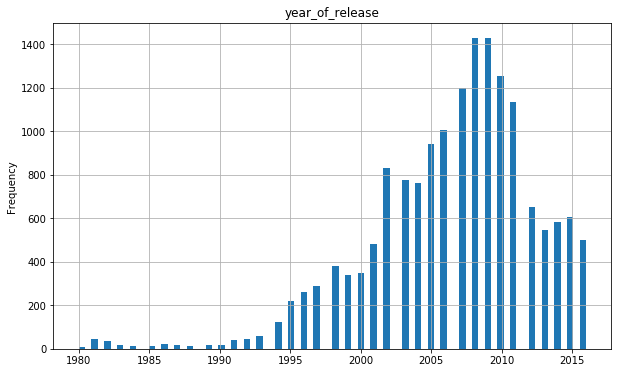

In [26]:
df['year_of_release'].plot(kind='hist',
                           bins=80,
                           figsize=(10, 6),
                           grid=True,
                           title='year_of_release');

Игр, проданных с 1980 по 1990 год очень мало. Мы можем отбросить этот промежуток времени.

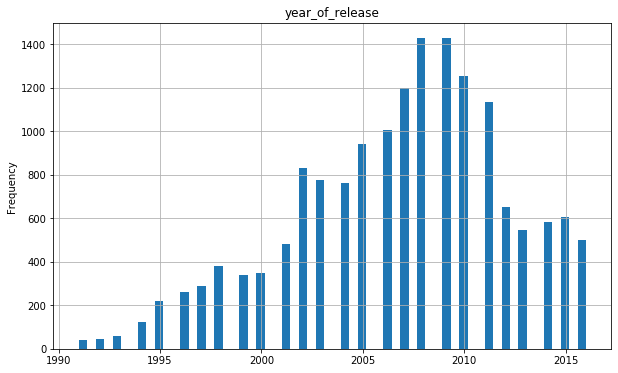

In [27]:
df.query('year_of_release > 1990')['year_of_release'].plot(kind='hist',
                           bins=60,
                           figsize=(10, 6),
                           grid=True,
                           title='year_of_release');

In [28]:
df = df.query('year_of_release > 1990').reset_index(drop=True).copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16223 entries, 0 to 16222
Data columns (total 12 columns):
name               16223 non-null object
platform           16223 non-null object
year_of_release    16223 non-null float64
genre              16223 non-null object
na_sales           16223 non-null int64
eu_sales           16223 non-null int64
jp_sales           16223 non-null int64
other_sales        16223 non-null int64
critic_score       7981 non-null float64
user_score         7461 non-null float64
rating             16223 non-null object
all_sales          16223 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.5+ MB


In [30]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41360000,28960000,3770000,8450000,76.0,8.0,E,82540000
1,Mario Kart Wii,Wii,2008.0,Racing,15680000,12760000,3790000,3290000,82.0,8.3,E,35520000
2,Wii Sports Resort,Wii,2009.0,Sports,15610000,10930000,3280000,2950000,80.0,8.0,E,32770000
3,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11270000,8890000,10220000,1000000,NaN,NaN,undefined,31380000
4,New Super Mario Bros.,DS,2006.0,Platform,11280000,9140000,6500000,2880000,89.0,8.5,E,29800000


Посмотрю ТОП-10 платформ, чтобы не выводить график для совсем незначащих платформ

In [31]:
top_platform_list = (df.pivot_table(index='platform',
                                    values='all_sales',
                                    aggfunc='sum') \
                     .reset_index() \
                     .sort_values(by='all_sales', ascending=False) \
                     .head(10)['platform'] \
                     .values)
top_platform_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

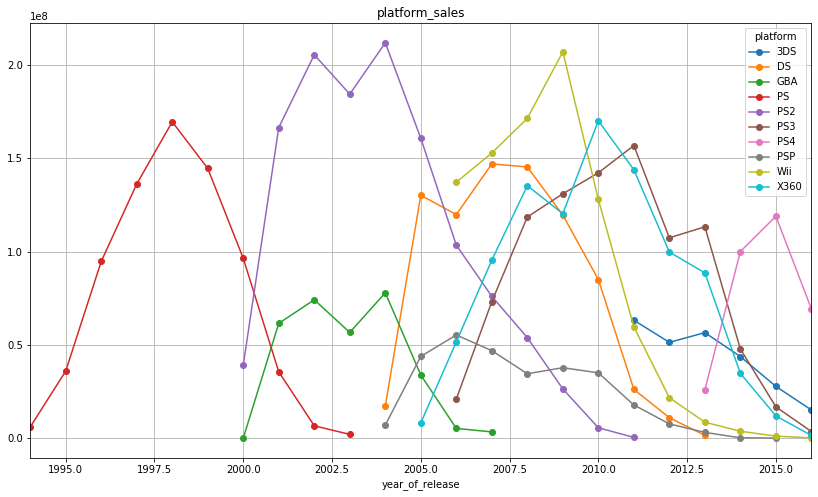

In [32]:
df.query('platform in @top_platform_list').pivot_table(index='year_of_release',
                                                        columns='platform',
                                                        values='all_sales',
                                                        aggfunc='sum').plot(figsize=(14, 8),
                                                                            style='o-',
                                                                            grid=True,
                                                                            title='platform_sales');

+ **PS2**: продажи были в промежуток с 2000 по 2011 (11 лет). У продаж было 2 пика: в 2002 и 2004 годах. У платформы по сравнению с остальными самый высокий пик продаж на наблюдаемом промежутке времени
+ **X360**: продажи начались в 2005 году (идут уже 11 лет). Пик продаж был в 2010 году. Продажи продолжаются до сих пор
+ **PS3**: продажи начались в 2006 году (идут уже 11 лет). У продаж был пик в 2011 году. Продажи продолжаются до сих пор
+ **Wii**: продажи начались в 2006 году (идут уже 11 лет). У продаж был пик в 2009 году. Это один из самых высоких показателей на наблюдаемом периоде времени. Продажи продолжаются до сих пор
+ **DS**: продажи были в промежуток с 2004 по 2013 (9 лет). Больше всего продаж было в 2007 и 2008 годах.
+ **PS**: продажи были в промежуток с 1994 по 2003 (9 лет). Пик пришелся на 1998 год
+ **PS4**: продажи начались в 2013 году (идут уже 3 года). Пик пришелся на 2015 год. Продажи продолжаются до сих пор
+ **GBA**: продажи были в промежуток с 2000 по 2007 (7 лет). Пик продаж пришелся на 2002 и 2004 год
+ **PSP**: продажи были в промежуток с 2004 по 2015 (11 лет). Больше всего продаж было в 2006 году. У этой платформы самое плавное снижение продаж по сравнению с остальными платформами.
+ **3DS**: родажи начались в 2011 году (идут уже 5 лет). Продажи начали снижение сразу же после выхода консоли на рынок.

В целом можно сказать, что платформы держатся примерно 9-11 лет, имеют довольно резкий взлет и такое же стремительное падение продаж. Все пики платформ приходились на промежуток от 2 до 5 лет с начала продаж. С 2004 по 2006 было наибольшее количество старта платформ (5 шт). Видимо, игровая индустрия начала активно развиваться в эти года после потрясающих успехов в продажах у PS и PS2 несколькими годами ранее.

Для дальнейших расчетов возьмем наиболее актуальный период времени: 2012-2016 гг.

In [33]:
df = df.query('year_of_release >= 2012').reset_index(drop=True).copy()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7020000,9090000,980000,3960000,97.0,8.2,M,21050000
1,Grand Theft Auto V,X360,2013.0,Action,9660000,5140000,60000,1410000,97.0,8.1,M,16270000
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6030000,5860000,360000,2380000,NaN,NaN,undefined,14630000
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5280000,4190000,4350000,780000,NaN,NaN,undefined,14600000
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4990000,5730000,650000,2420000,83.0,5.3,M,13790000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null float64
genre              2886 non-null object
na_sales           2886 non-null int64
eu_sales           2886 non-null int64
jp_sales           2886 non-null int64
other_sales        2886 non-null int64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             2886 non-null object
all_sales          2886 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 270.7+ KB


Поищем перспективные платформы. Для начала уберем те платформы, продажи по которым прекратились.

In [35]:
df.pivot_table(index='year_of_release',
               columns='platform',
               values='all_sales',
               aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51359999.0,11010000.0,23220000.0,107360000.0,NaN,7690000.0,16190000.0,21710000.0,17560000.0,99740000.0,NaN
2013.0,56570000.0,1540000.0,12380000.0,113249999.0,25990000.0,3140000.0,10590000.0,8590000.0,21650000.0,88580000.0,18960000.0
2014.0,43760000.0,NaN,13280000.0,47759999.0,99999998.0,240000.0,11900000.0,3750000.0,22030000.0,34740000.0,54070000.0
2015.0,27780000.0,NaN,8520000.0,16820000.0,118899999.0,120000.0,6250000.0,1140000.0,16350000.0,11960000.0,60140000.0
2016.0,15140000.0,NaN,5250000.0,3600000.0,69250000.0,NaN,4250000.0,180000.0,4600000.0,1520000.0,26149999.0


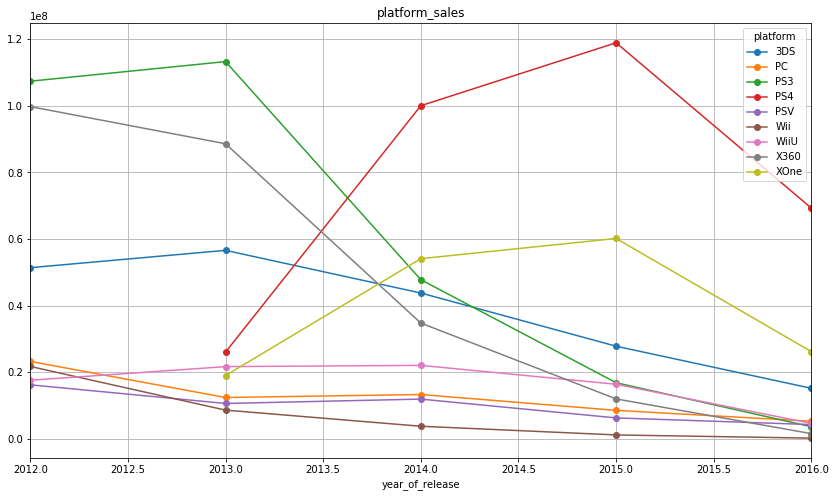

In [36]:
df.query('platform not in ["DS", "PSP"]').pivot_table(index='year_of_release',
                                                      columns='platform',
                                                      values='all_sales',
                                                      aggfunc='sum').plot(figsize=(14, 8),
                                                                          style='o-',
                                                                          grid=True,
                                                                          title='platform_sales');

In [37]:
df.query('platform not in ["DS", "PSP"]') \
    .pivot_table(index='platform',
                 values='all_sales',
                 aggfunc='sum') \
    .reset_index() \
    .sort_values(by='all_sales', ascending=False) \
    .head()

,platform,all_sales
3,PS4,314139997
2,PS3,288789998
7,X360,236540000
0,3DS,194609999
8,XOne,159319999


ТОП-5 лидеров продаж за этот промежуток времени: PS4, PS3, X360, 3DS, XOne. При этом у большинства из них продажи либо уже прекратились, либо идут вниз.
Судя по росту, перспективными можно назвать PS4 и XOne (в теории могут повторить своий пик продаж или превысить его в промежутке 2017-2018 гг).

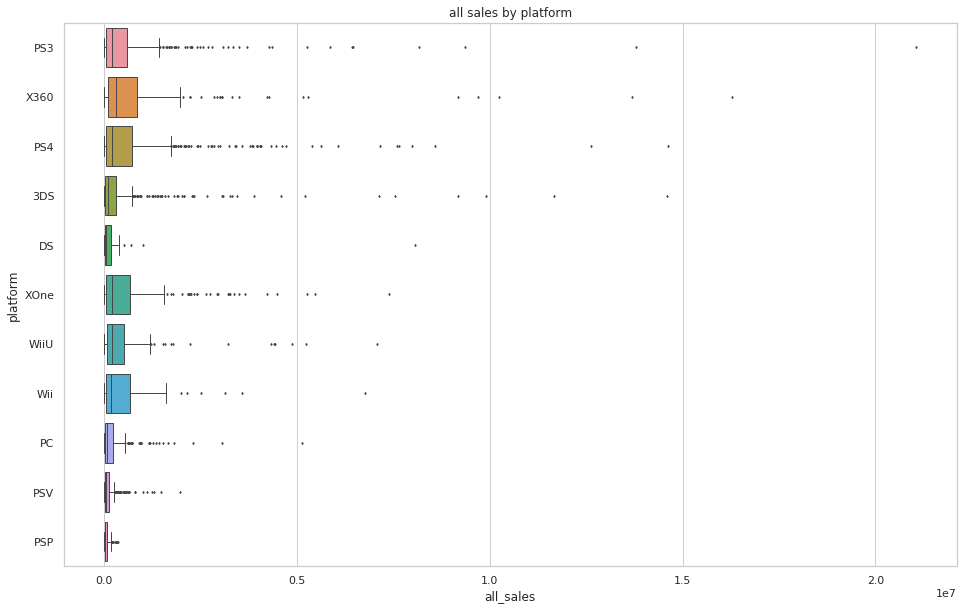

In [38]:
sns.set(rc={'figure.figsize':(16, 10)})
sns.set_style('whitegrid')
sns.boxplot(data=df, y='platform', x='all_sales', fliersize=1.5, linewidth=1).set_title("all sales by platform");

Здесь я могу сказать, что продажи у PSP, DS и PSV хоть и имеют выбросы, но они более консолидированы вокруг медианы. В обратную сторону (больший разброс) выделяются платформы 3DS, PS3, PS4 и X360. Можно предположить, что у карманных консолей (за исключением 3DS) в целом отсутствуют игры со сверхпродажами. А вот у домашних консолей как раз есть игры, имеющие ошеломительный успех.

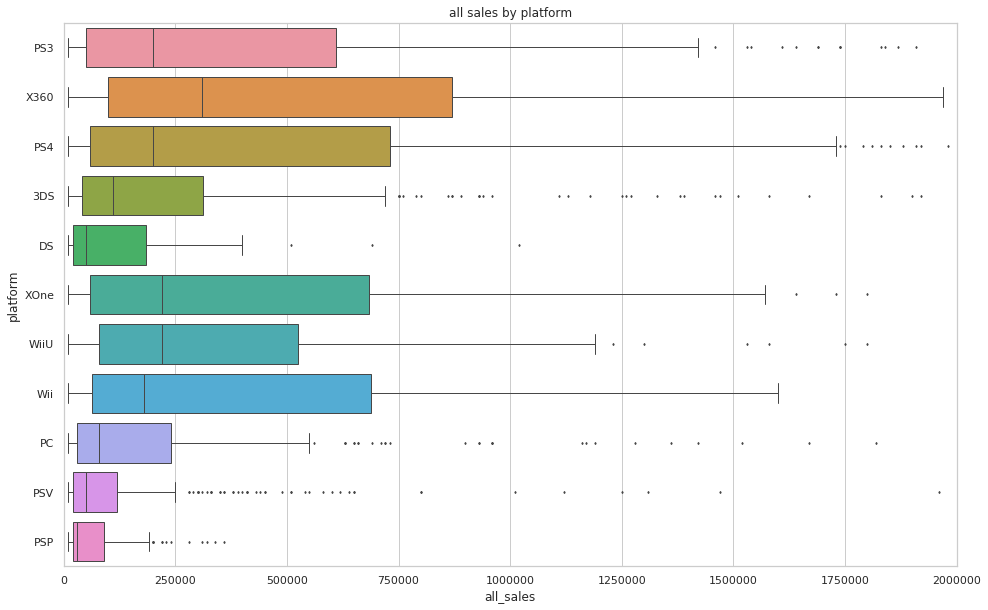

In [39]:
sns.set(rc={'figure.figsize':(16, 10)})
sns.set_style('whitegrid')
sns.boxplot(data=df, y='platform', x='all_sales', fliersize=1.5, linewidth=1).set_title("all sales by platform")
plt.xlim(0, 2000000)
plt.show();

Судя по усам и медианам можно сказать, что у всех платформ распределение продаж не нормальное и скошено вправо.

In [40]:
top_platforms_per_region = df.pivot_table(index='platform',
                                          values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'],
                                          aggfunc='sum').reset_index()

In [41]:
top_platforms_per_region.sort_values(by='all_sales', ascending=False).head(2)

,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
4,PS4,314139997,141089998,15960000,108739999,48350000
3,PS3,288789998,106860000,35290000,103379998,43260000


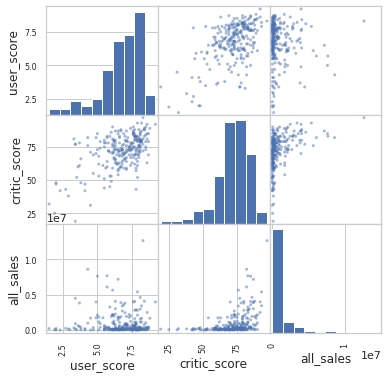

In [42]:
pd.plotting.scatter_matrix(df.query('platform == "PS4"')[['user_score',
                                                          'critic_score',
                                                          'all_sales']], figsize=(6, 6));

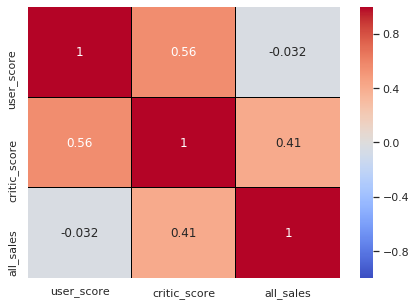

In [43]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.heatmap(df.query('platform == "PS4"')[['user_score',
                                           'critic_score',
                                           'all_sales']].corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            center= 0,
            cmap='coolwarm',
            linewidths=.01,
            linecolor='black');

Судя по диаграмме рассеяния и хитмапу, корелляции между оценкой пользователей и продажами нет почти совсем, а между оценкой критиков и продажами корелляция не существенная. При этом корреляция оценок пользователей и критиков уже выше. Можно сказать, при покупке игр пользователи не ориентируются на пользовательскую оценку и на оценку критиков.

In [44]:
sales_per_genres = df.pivot_table(index='genre',
                                  values='all_sales',
                                  aggfunc=['count', 'sum', 'mean']).reset_index()

sales_per_genres.columns = [' '.join(col).strip() for col in sales_per_genres.columns.values]

sales_per_genres = sales_per_genres.rename({'count all_sales': 'count_all_sales',
                                            'sum all_sales': 'sum_all_sales',
                                            'mean all_sales': 'mean_sales_per_game'}, axis='columns')

In [45]:
sales_per_genres.sort_values(by='sum_all_sales', ascending=False)

,genre,count_all_sales,sum_all_sales,mean_sales_per_game
0,Action,1031,441119998,4.278564e+05
8,Shooter,235,304729998,1.296723e+06
7,Role-Playing,370,192800000,5.210811e+05
10,Sports,268,181069999,6.756343e+05
3,Misc,192,85039999,4.429167e+05
4,Platform,85,61000000,7.176471e+05
6,Racing,115,53500000,4.652174e+05
2,Fighting,109,44490000,4.081651e+05
9,Simulation,80,35119999,4.390000e+05
1,Adventure,302,29430000,9.745033e+04


In [46]:
sales_per_genres.sort_values(by='count_all_sales', ascending=False)

,genre,count_all_sales,sum_all_sales,mean_sales_per_game
0,Action,1031,441119998,4.278564e+05
7,Role-Playing,370,192800000,5.210811e+05
1,Adventure,302,29430000,9.745033e+04
10,Sports,268,181069999,6.756343e+05
8,Shooter,235,304729998,1.296723e+06
3,Misc,192,85039999,4.429167e+05
6,Racing,115,53500000,4.652174e+05
2,Fighting,109,44490000,4.081651e+05
4,Platform,85,61000000,7.176471e+05
9,Simulation,80,35119999,4.390000e+05


In [47]:
sales_per_genres.sort_values(by='mean_sales_per_game', ascending=False)

,genre,count_all_sales,sum_all_sales,mean_sales_per_game
8,Shooter,235,304729998,1.296723e+06
4,Platform,85,61000000,7.176471e+05
10,Sports,268,181069999,6.756343e+05
7,Role-Playing,370,192800000,5.210811e+05
6,Racing,115,53500000,4.652174e+05
3,Misc,192,85039999,4.429167e+05
9,Simulation,80,35119999,4.390000e+05
0,Action,1031,441119998,4.278564e+05
2,Fighting,109,44490000,4.081651e+05
11,Strategy,71,13340000,1.878873e+05


ТОП-3 самых прибыльных жанров: Action, Shooter, Role-Playing. Стоит учесть, что и игр этих жанров выпущено больше всего.
Самые непопулярные - Simulation, Strategy, Puzzle.  
Отличие сумм продаж самого популярного и самого непопулярного жанров стократное.  
Если же смотреть на среднее проданных копий на игру, то в ТОП-3 попадают Shooter, Platform и Sports, а аутсайдерами становятся Strategy, Puzzle и Adventure.

Вот здесь у меня образовалась теория: а что, если количество выпущенных игр зависит от спроса?! Может быть, их (Action, Shooter, Role-Playing) потому и больше выпущено, что к ним был бОльший интерес пользователей и соответственно их же и раскупили больше. Ведь тогда нельзя считать нормализованные продажи. Чтобы это проверить, можно посмотреть в разбивке по годам и жанрам на количество выпущенных игр и сравнить с количеством проданных копий на игру. Если мы увидим, что в определенный год количество проданных копий на игру в определенном жанре будет увеличиваться, а количество игр в этом жанре пойдет в рост только на следующий год и при этом общее количество проданных копий будет плюс-минус одинаковым, то можно будет смело сказать, что спрос рождает предложение и нормализовывать ТОП-3 самых прибыльных жанров не стоило.

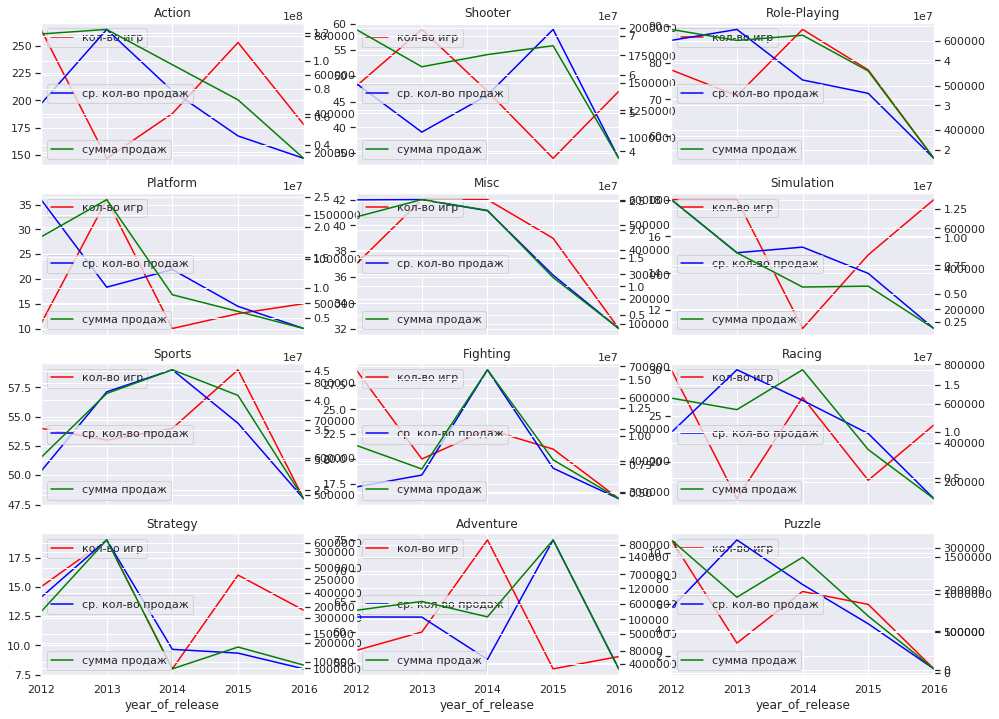

In [48]:
genre_list = df.genre.unique()

# таблица с количеством игр по годам
genre_count = df.pivot_table(index='year_of_release',columns='genre',values='all_sales',aggfunc='count')
# таблица со средним количеством продаж на игру по годам
genre_mean = df.pivot_table(index='year_of_release',columns='genre',values='all_sales')
# таблица с объемом продаж по годам
genre_sum = df.pivot_table(index='year_of_release',columns='genre',values='all_sales', aggfunc='sum')

# тут создаем сабплот, чтобы графики заняли меньше места
fig, axs = plt.subplots(4,3, figsize=(16, 12))
axs = axs.ravel()
# ax2 и ax3 - отдельные оси для продаж и кол-ва игр
ax2 = [i for i in range(len(axs))]
ax3 = [i for i in range(len(axs))]

for i, genre in enumerate(genre_list):
    ax2[i] = axs[i].twinx()
    ax3[i] = axs[i].twinx()
    genre_count[genre].plot(ax=axs[i], label='кол-во игр', color='red')
    genre_mean[genre].plot(ax=ax2[i], label='ср. кол-во продаж', color='blue')
    genre_sum[genre].plot(ax=ax3[i], label='сумма продаж', color='green')
    axs[i].set_title(genre)
    axs[i].legend(loc='upper left')
    ax2[i].legend(loc='center left')
    ax3[i].legend(loc='lower left')

Теория подтверждается почти идеально в жанре Role-Playing. В меньшей степени в жанрах Action и Sports. В Role-Playing сначала было относительно мало игр, при этом сумма продаж и средние продажи на игру были высоки. И в следующем году компании стали больше выпускать игры в этих жанрах. При этом упали средние продажи при сохранении общей суммы продаж. Это логично. Покупательская способность пользователей не безгранична. А как только упал интерес к жанру, то начали падать и средняя и количество выпущенных игр.

Теория не подтверждается всеми остальными неназванными жанрами, соответственно нормализованные данные во внимание не беру.

In [49]:
top_platforms_per_region

,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,3DS,194609999,42640000,87790000,55309999,8870000
1,DS,12550000,3530000,3720000,4590000,710000
2,PC,62650000,37760000,0,19120000,5770000
3,PS3,288789998,106860000,35290000,103379998,43260000
4,PS4,314139997,141089998,15960000,108739999,48350000
5,PSP,11190000,420000,10470000,130000,170000
6,PSV,49180000,11360000,21040000,10980000,5800000
7,Wii,35370000,11920000,3390000,17450000,2610000
8,WiiU,82190000,25130000,13010000,38100000,5950000
9,X360,236540000,74520000,1570000,140050000,20400000


Функция, создающая колонки с долями продаж по регионам.

In [50]:
def add_part(data, columns):
    for col in columns:
        total_sum = sum(data[col])
        data[str(col + '_part')] = round(data[col] / total_sum, 2)

In [51]:
add_part(top_platforms_per_region, ['eu_sales', 'na_sales', 'jp_sales', 'other_sales'])

In [52]:
top_platforms_per_region

,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales,eu_sales_part,na_sales_part,jp_sales_part,other_sales_part
0,3DS,194609999,42640000,87790000,55309999,8870000,0.08,0.09,0.46,0.06
1,DS,12550000,3530000,3720000,4590000,710000,0.01,0.01,0.02,0.00
2,PC,62650000,37760000,0,19120000,5770000,0.07,0.03,0.00,0.04
3,PS3,288789998,106860000,35290000,103379998,43260000,0.21,0.17,0.18,0.28
4,PS4,314139997,141089998,15960000,108739999,48350000,0.28,0.18,0.08,0.31
5,PSP,11190000,420000,10470000,130000,170000,0.00,0.00,0.05,0.00
6,PSV,49180000,11360000,21040000,10980000,5800000,0.02,0.02,0.11,0.04
7,Wii,35370000,11920000,3390000,17450000,2610000,0.02,0.03,0.02,0.02
8,WiiU,82190000,25130000,13010000,38100000,5950000,0.05,0.06,0.07,0.04
9,X360,236540000,74520000,1570000,140050000,20400000,0.15,0.24,0.01,0.13


In [53]:
top_platforms_per_region[['platform', 'eu_sales', 'eu_sales_part']].sort_values(by='eu_sales', ascending=False).head()

,platform,eu_sales,eu_sales_part
4,PS4,141089998,0.28
3,PS3,106860000,0.21
9,X360,74520000,0.15
10,XOne,51589999,0.10
0,3DS,42640000,0.08


In [54]:
top_platforms_per_region[['platform', 'na_sales', 'na_sales_part']].sort_values(by='na_sales', ascending=False).head()

,platform,na_sales,na_sales_part
9,X360,140050000,0.24
4,PS4,108739999,0.18
3,PS3,103379998,0.17
10,XOne,93120000,0.16
0,3DS,55309999,0.09


In [55]:
top_platforms_per_region[['platform', 'jp_sales', 'jp_sales_part']].sort_values(by='jp_sales', ascending=False).head()

,platform,jp_sales,jp_sales_part
0,3DS,87790000,0.46
3,PS3,35290000,0.18
6,PSV,21040000,0.11
4,PS4,15960000,0.08
8,WiiU,13010000,0.07


In [56]:
top_platforms_per_region[['platform', 'other_sales', 'other_sales_part']].sort_values(by='other_sales', ascending=False).head()

,platform,other_sales,other_sales_part
4,PS4,48350000,0.31
3,PS3,43260000,0.28
9,X360,20400000,0.13
10,XOne,14270000,0.09
0,3DS,8870000,0.06


ТОП-5 платформ в Европе:
+ PS4 (28% от общих продаж в регионе)
+ PS3 (21%)
+ X360 (15%)
+ XOne (10%)
+ 3DS (8%)

ТОП-5 платформ в Северной Америке:
+ X360 (24%)
+ PS4 (18%)
+ PS3 (17%)
+ XOne (16%)
+ 3DS (9%)

ТОП-5 платформ в Японии:
+ 3DS (46% лидирует с большим отрывом)
+ PS3 (18%)
+ PSV (11%)
+ PS4 (8%)
+ WiiU (7%)

ТОП-5 платформ в других регионах:
+ PS4 (31%)
+ PS3 (28%)
+ X360 (13%)
+ XOne (9%)
+ 3DS (6%)

Абсолютно во всех регионах в топе находятся платформы PS3, PS4 и 3DS. При этом в Японии 3DS занимает почти половину доли всех продаж региона. Еще Япония отличается от остальных регионов тем, что в топе не находятся платформы XOne и X360. Их заместили PSV и WiiU.

In [57]:
top_genres_per_region = df.pivot_table(index='genre',
                                       values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'],
                                       aggfunc='sum').reset_index()

In [58]:
top_genres_per_region

,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,441119998,159339999,52800000,177839999,51140000
1,Adventure,29430000,9460000,8240000,8920000,2810000
2,Fighting,44490000,10790000,9440000,19790000,4470000
3,Misc,85039999,26320000,12860000,38189999,7670000
4,Platform,61000000,21410000,8630000,25380000,5580000
5,Puzzle,4890000,1400000,2140000,1130000,220000
6,Racing,53500000,27290000,2500000,17220000,6490000
7,Role-Playing,192800000,48530000,65440000,64000000,14830000
8,Shooter,304729998,113469999,9230000,144769999,37260000
9,Simulation,35119999,14550000,10410000,7969999,2190000


In [59]:
add_part(top_genres_per_region, ['eu_sales', 'na_sales', 'jp_sales', 'other_sales'])

In [60]:
top_genres_per_region

,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales,eu_sales_part,na_sales_part,jp_sales_part,other_sales_part
0,Action,441119998,159339999,52800000,177839999,51140000,0.31,0.30,0.27,0.33
1,Adventure,29430000,9460000,8240000,8920000,2810000,0.02,0.02,0.04,0.02
2,Fighting,44490000,10790000,9440000,19790000,4470000,0.02,0.03,0.05,0.03
3,Misc,85039999,26320000,12860000,38189999,7670000,0.05,0.06,0.07,0.05
4,Platform,61000000,21410000,8630000,25380000,5580000,0.04,0.04,0.04,0.04
5,Puzzle,4890000,1400000,2140000,1130000,220000,0.00,0.00,0.01,0.00
6,Racing,53500000,27290000,2500000,17220000,6490000,0.05,0.03,0.01,0.04
7,Role-Playing,192800000,48530000,65440000,64000000,14830000,0.10,0.11,0.34,0.09
8,Shooter,304729998,113469999,9230000,144769999,37260000,0.22,0.24,0.05,0.24
9,Simulation,35119999,14550000,10410000,7969999,2190000,0.03,0.01,0.05,0.01


In [61]:
top_genres_per_region[['genre', 'eu_sales', 'eu_sales_part']].sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales,eu_sales_part
0,Action,159339999,0.31
8,Shooter,113469999,0.22
10,Sports,69089999,0.14
7,Role-Playing,48530000,0.10
6,Racing,27290000,0.05


In [62]:
top_genres_per_region[['genre', 'na_sales', 'na_sales_part']].sort_values(by='na_sales', ascending=False).head()

,genre,na_sales,na_sales_part
0,Action,177839999,0.30
8,Shooter,144769999,0.24
10,Sports,81530000,0.14
7,Role-Playing,64000000,0.11
3,Misc,38189999,0.06


In [63]:
top_genres_per_region[['genre', 'jp_sales', 'jp_sales_part']].sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales,jp_sales_part
7,Role-Playing,65440000,0.34
0,Action,52800000,0.27
3,Misc,12860000,0.07
9,Simulation,10410000,0.05
2,Fighting,9440000,0.05


In [64]:
top_genres_per_region[['genre', 'other_sales', 'other_sales_part']].sort_values(by='other_sales', ascending=False).head()

,genre,other_sales,other_sales_part
0,Action,51140000,0.33
8,Shooter,37260000,0.24
10,Sports,22440000,0.14
7,Role-Playing,14830000,0.09
3,Misc,7670000,0.05


ТОП-5 жанров в Европе:
+ Action (31% от общих продаж в регионе)
+ Shooter (22%)
+ Sports (14%)
+ Role-Playing (10%)
+ Racing (5%)

ТОП-5 жанров в Северной Америке:
+ Action (30%)
+ Shooter (24%)
+ Sports (14%)
+ Role-Playing (11%)
+ Misc (6%)

ТОП-5 жанров в Японии:
+ Role-Playing (34%)
+ Action (27%)
+ Misc (7%)
+ Simulation (5%)
+ Fighting (5%)

ТОП-5 жанров в других регионах:
+ Action (33%)
+ Shooter (24%)
+ Sports (14%)
+ Role-Playing (9%)
+ Misc (5%)

Абсолютно во всех регионах в топе присутствуют жанры Action и Role-Playing. Европейские пользователи отличаются от остальных тем, что в топ не попал жанр Misc, но зато есть жанр Racing, отсутствующий в топах остальных регионов. Япония отличается отсутствием в топе жанров Sports и Shooter. Их место заняли жанры Simulation и Fighting. Так же отмечу, что в Японии 61% рынка заняли Role-Playing и Action, а остальные жанры распределились равномерно с малыми долями. В остальных регионах жанры распределены более равномерно.

In [65]:
top_rating_per_region = df.pivot_table(index='rating',
                                       values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                       aggfunc='sum').reset_index()

In [66]:
top_rating_per_region

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,113029999,28330000,114369999,31440000
1,E10+,55370000,8190000,75700000,16230000
2,M,193959999,21200000,231569999,63380000
3,T,52959999,26020000,66019999,17940000
4,undefined,91500000,108840000,103309999,27170000


In [67]:
add_part(top_rating_per_region, ['eu_sales', 'na_sales', 'jp_sales', 'other_sales'])

In [68]:
top_rating_per_region

,rating,eu_sales,jp_sales,na_sales,other_sales,eu_sales_part,na_sales_part,jp_sales_part,other_sales_part
0,E,113029999,28330000,114369999,31440000,0.22,0.19,0.15,0.20
1,E10+,55370000,8190000,75700000,16230000,0.11,0.13,0.04,0.10
2,M,193959999,21200000,231569999,63380000,0.38,0.39,0.11,0.41
3,T,52959999,26020000,66019999,17940000,0.10,0.11,0.14,0.11
4,undefined,91500000,108840000,103309999,27170000,0.18,0.17,0.57,0.17


In [69]:
top_rating_per_region[['rating', 'eu_sales', 'eu_sales_part']].sort_values(by='eu_sales', ascending=False)

,rating,eu_sales,eu_sales_part
2,M,193959999,0.38
0,E,113029999,0.22
4,undefined,91500000,0.18
1,E10+,55370000,0.11
3,T,52959999,0.10


In [70]:
top_rating_per_region[['rating', 'na_sales', 'na_sales_part']].sort_values(by='na_sales', ascending=False)

,rating,na_sales,na_sales_part
2,M,231569999,0.39
0,E,114369999,0.19
4,undefined,103309999,0.17
1,E10+,75700000,0.13
3,T,66019999,0.11


In [71]:
top_rating_per_region[['rating', 'jp_sales', 'jp_sales_part']].sort_values(by='jp_sales', ascending=False)

,rating,jp_sales,jp_sales_part
4,undefined,108840000,0.57
0,E,28330000,0.15
3,T,26020000,0.14
2,M,21200000,0.11
1,E10+,8190000,0.04


In [72]:
top_rating_per_region[['rating', 'other_sales', 'other_sales_part']].sort_values(by='other_sales', ascending=False)

,rating,other_sales,other_sales_part
2,M,63380000,0.41
0,E,31440000,0.20
4,undefined,27170000,0.17
3,T,17940000,0.11
1,E10+,16230000,0.10


ТОП-5 рейтингов в Европе:
+ M (38% от общих продаж в регионе)
+ E (22%)
+ Undefined (18%)
+ E10+ (111%)
+ T (10%)

ТОП-5 рейтингов в Северной Америке:
+ M (39%)
+ E (19%)
+ Undefined (17%)
+ E10+ (13%)
+ T (11%)

ТОП-5 рейтингов в Японии:
+ Undefined (57%)
+ E (15%)
+ T (14%)
+ M (11%)
+ E10+ (4%)

ТОП-5 рейтингов в других регионах:
+ M (41%)
+ E (20%)
+ Undefined (17%)
+ T (11%)
+ E10+ (10%)

В топ-5 в каждом регионе присутствуют одни и те же рейтинги: M, E, E10+, T, Undefined.
По распределению топа рейтингов регионы в целом повторяют друг друга за исключением Японии. Тогда как во всех регионах лидируют игры с рейтингами M и E и распределение топ-5 в целом более равномерное, в Японии на первом месте и занимают больше половины рынка игры с неопределенным рейтингом (Undefined).

## Проверка гипотез

#### Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#### Альтернативная гипотеза: пользовательские рейтинги платформ Xbox One и PC значимо различаются

Для проверки этой и следующей гипотезы я буду применять метод scipy.stats.ttest_ind, так как он проверяет гипотезу о равенстве среднего двух генеральных совокупностей (мы же как раз их и проверяем). Альфу возьму 0.05, т.к. думаю, что 5% барьера нам вполне достаточно.

In [73]:
alpha = 0.05

In [74]:
def equal_hypothesis(data_1, data_2, column): # функция проверки гипотезы о равенстве средних двух выборок
    if data_2[column].var() * 0.95 <= data_1[column].var() <= data_2[column].var() * 1.05: # равны ли дисперсии примерно
        equal_var = True
    else:
        equal_var = False
    results = st.ttest_ind(data_1[column],
                           data_2[column],
                           equal_var=equal_var)
    if results.pvalue < alpha:
        print('p-value = {}. Отвергаем нулевую гипотезу'.format(results.pvalue))
    else:
        print('p-value = {}. Не получилось отвергнуть нулевую гипотезу'.format(results.pvalue)) 

In [75]:
equal_hypothesis(df.query('platform == "XOne" and user_score == user_score'),
                 df.query('platform == "PC" and user_score == user_score'),
                 'user_score')

p-value = 0.5489537965134912. Не получилось отвергнуть нулевую гипотезу


Это значит, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Нулевая гипотеза: пользовательские рейтинги жанров Action и Sports одинаковы
#### Альтернативная гипотеза: пользовательские рейтинги жанров Action и Sports значимо различаются

In [76]:
equal_hypothesis(df.query('genre == "Action" and user_score == user_score'),
                 df.query('genre == "Sports" and user_score == user_score'),
                 'user_score')

p-value = 4.24307776572644e-20. Отвергаем нулевую гипотезу


Значит, пользовательские рейтинги жанров Action и Sports значимо различаются.

## Вывод

По итогу получения, обработки и исследования данных, а так же проверки гипотез, могу сказать следующее:
+ на входе мы получили катастрофически мало значений в столбцах 'rating', 'user_score' и 'critic_score'. Скорее всего, в дальнейшем нужно будет парсить эти данные на каких-нибудь площадках по продаже игр.
+ наибольшее количество выпущенных игр, наибольшая общая сумма продаж и максимальное разнообразие платформ было в период с 2004 по 2014 год
+ срок жизни платформы примерно 9-11 лет
+ пика продаж платформы достигают через 2-5 лет с начала продаж
+ для платформ характерны резкий взлет и стремительное падение
+ игры для персонального компьютера дают наименьшую выручку, но зато продажи длятся на всем наблюдаемом промежутке времени
+ перспективными являются платформы PlayStation 4 и Xbox One
+ при покупке игр пользователи почти не ориентируются на отзывы критиков и совершенно не учитывают пользовательские отзывы
+ Самые продаваемые жанры это Action, Shooter и Role-Playing. Самые непопулярные - Simulation, Strategy и Puzzle. Отличие сумм продаж самого популярного и самого непопулярного жанров стократное.
+ Абсолютно во всех регионах в ТОП-5 находятся платформы PS3, PS4 и 3DS. При этом в Японии 3DS занимает почти половину доли всех продаж региона. Еще Япония отличается от остальных регионов тем, что в топе не находятся платформы XOne и X360. Их заместили PSV и WiiU.
+ Абсолютно во всех регионах в ТОП-5 присутствуют жанры Action и Role-Playing. Европейские пользователи отличаются от остальных тем, что в топ не попал жанр Misc, но зато есть жанр Racing, отсутствующий в топах остальных регионов. Япония отличается отсутствием в топе жанров Sports и Shooter. Их место заняли жанры Simulation и Fighting. Стоит заметить, что в Японии 61% рынка заняли Role-Playing и Action, а остальные жанры распределились равномерно с малыми долями. В остальных регионах жанры распределены более равномерно.
+ В топ-5 в каждом регионе присутствуют одни и те же рейтинги: M, E, E10+, T, Undefined. По распределению топа рейтингов регионы в целом повторяют друг друга за исключением Японии. Тогда как во всех регионах лидируют игры с рейтингами M и E и распределение топ-5 в целом более равномерное, в Японии же на первом месте и занимают больше половины рынка игры с неопределенным рейтингом (Undefined).
+ проведя тест о равенстве среднего двух генеральных совокупностей, можно сказать, что пользовательские рейтинги платформ Xbox One и PC одинаковые. А пользовательские рейтинги жанров Action и Sports значимо различаются.